# Hierarchical Bayesian Recommender



In [1]:
from hbm import HierarchicalBayesianRecommender

import sys
import os
sys.path.append(os.path.abspath('..'))
from eval_framework.reporter import HBMRecommenderReporter as RecommenderReporter
from eval_framework.data_loader import load_data, split_data


## Load and Split Data

In [2]:
# Load and preprocess data
ratings, movies = load_data()  # Use all users
train_ratings, test_ratings = split_data(ratings)

Loading data...
Loading MovieLens 100K dataset...
Loaded 100836 ratings and 9742 movies
\nSplitting data...
Training set size: 80668, Test set size: 20168


## Initialize and Train Model


In [3]:
# Initialize model
print("Initializing model...")
model = HierarchicalBayesianRecommender()

# Fit model
print("Fitting model...")
model.fit(train_ratings, movies)


Initializing model...
Fitting model...
Fitting model with MCMC...
Configuration: chains=4, draws=1000, tune=1000, target_accept=0.9


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_alpha, sigma_beta, sigma, mu, alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 713 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Model fitting completed.


## Evaluate Model


In [4]:
# Evaluate model
reporter = RecommenderReporter()
results = reporter.evaluate_model(model, test_ratings)

\nEvaluating predictions...


Evaluating ratings: 100%|██████████| 20168/20168 [00:00<00:00, 22252.54it/s]


## Visualize Results


In [5]:
# Plot results
reporter.print_stats()


Universal Evaluation Metrics:
MSE: 0.7647
RMSE: 0.8745
MAE: 0.6683

HBM Model Parameter Statistics:
Global Mean (μ): 3.456
User Bias (α) - Mean: 0.000, Std: 0.411
Movie Bias (β) - Mean: -0.000, Std: 0.328



Generating universal plots...


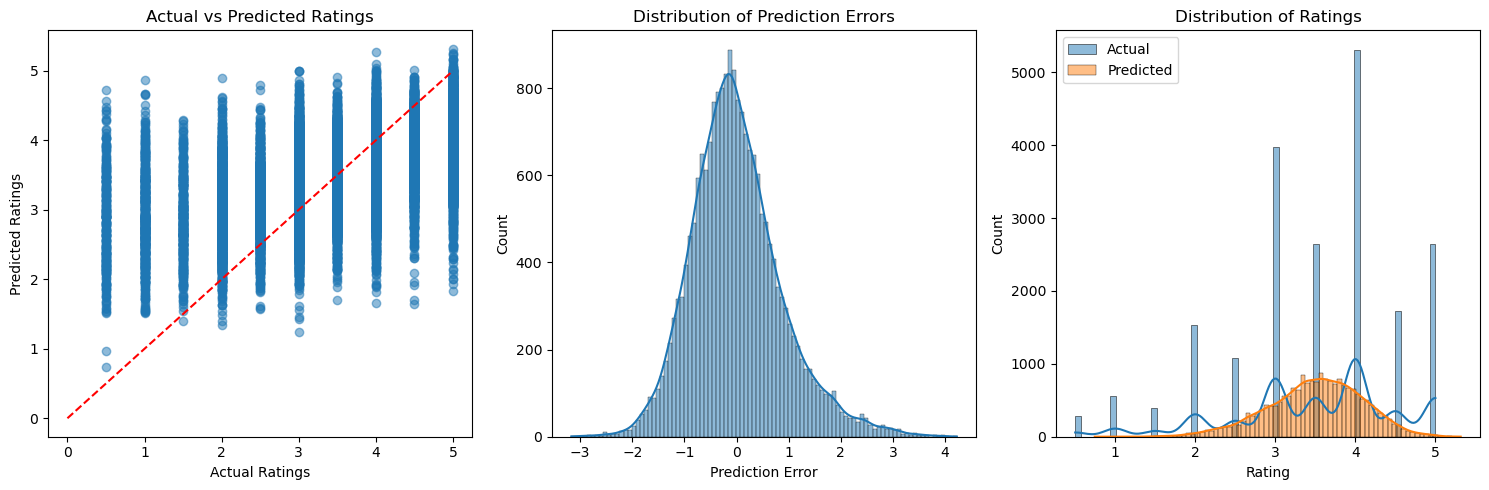

Adding HBM parameter distribution plot...


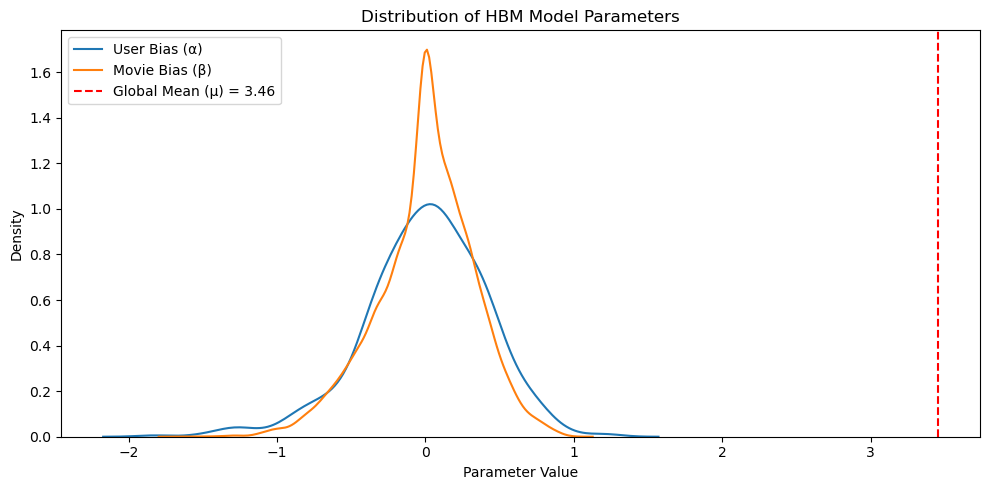

In [6]:
reporter.plot_all()

## Generate Sample Recommendations


In [7]:
# Generate recommendations for a sample user
print("Generating recommendations for a sample user...")
sample_user = test_ratings['userId'].iloc[0]
recommendations = model.get_recommendations(sample_user, n_recommendations=5)

print("\nTop 5 recommendations for user", sample_user)
for movie_id, score in recommendations:
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    print(f"Movie: {movie_title}, Predicted Rating: {score:.2f}")


Generating recommendations for a sample user...


Generating recommendations: 100%|██████████| 20/20 [00:00<00:00, 28966.19it/s]


Top 5 recommendations for user 432
Movie: Casino (1995), Predicted Rating: 3.98
Movie: Heat (1995), Predicted Rating: 3.96
Movie: Sense and Sensibility (1995), Predicted Rating: 3.79
Movie: American President, The (1995), Predicted Rating: 3.75
Movie: Nixon (1995), Predicted Rating: 3.70
